# Загрузка датасета и первый взгляд

In [2]:
!mkdir ./data
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem6/zhestov.ea%40phystech.edu.csv -O data/zhestov.ea@phystech.edu.csv

--2021-03-16 16:51:47--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem6/zhestov.ea%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75204 (73K) [text/plain]
Saving to: ‘data/zhestov.ea@phystech.edu.csv’

data/zhestov.ea@phy 100%[===================>]  73.44K  --.-KB/s    in 0.007s  

2021-03-16 16:51:47 (9.71 MB/s) - ‘data/zhestov.ea@phystech.edu.csv’ saved [75204/75204]



In [15]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

In [22]:
data = pd.read_csv('./data/zhestov.ea@phystech.edu.csv', header=None, names=['f', 'c1', 'c2'])
data.head()

,f,c1,c2
0,1.292698,1.0,4.0
1,1.152578,5.0,2.0
2,1.201221,5.0,2.0
3,-0.660971,1.0,2.0
4,0.267133,1.0,4.0


In [23]:
data.describe()

,f,c1,c2
count,1000.000000,1000.000000,1000.00000
mean,2.177166,2.972000,3.01000
std,2.891430,2.000805,1.00045
min,-3.138948,1.000000,2.00000
25%,0.162626,1.000000,2.00000
50%,1.129893,1.000000,4.00000
75%,2.890768,5.000000,4.00000
max,9.997608,5.000000,4.00000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       1000 non-null   float64
 1   c1      1000 non-null   float64
 2   c2      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [30]:
data['c1_c2'] = data['c1'] / data['c2']

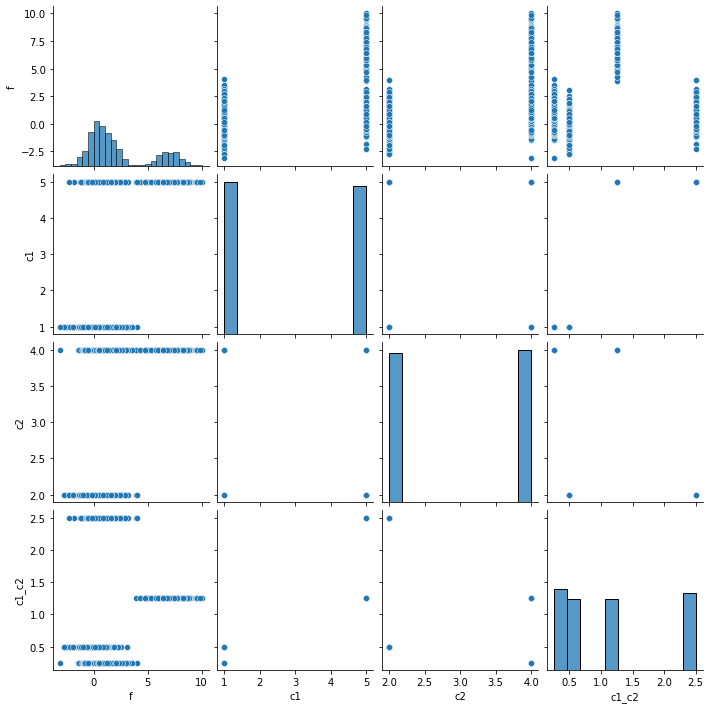

In [31]:
sns.pairplot(data)

Бинарные признаки, поэтому скорее всего тут сигмоида.

# Задание

## Вопросы
- Проверить с использованием двухфакторного дисперсионного анализа, влияет ли переменная C1 на переменную f в данной линейной модели?
- Проверить с использованием двухфакторного дисперсионного анализа, влияет ли переменная C2 на переменную f в данной линейной модели?
- Проверить с использованием двухфакторного дисперсионного анализа, влияет ли межфакторное взаимодействие на переменную f в данной линейной модели?

In [41]:
linear_model = sm.ols('f ~ c1 + c2 + c1 : c2', data=data).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      f   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     2360.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:31:54   Log-Likelihood:                -1433.7
No. Observations:                1000   AIC:                             2875.
Df Residuals:                     996   BIC:                             2895.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0782      0.186     -0.421      0.674      -0.443       0.286
c1            -0.9857      0.051    -19.306      0.000      -1.086      -0.886
c2            -0.0956      0.058     -1.657      0.098      -0.209       0.018
c1:c2          0.6195      0.016     38.466      0.000       0.588       0.651
==============================================================================
Omnibus:                        2.617   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                2.670
Skew:                          -0.053   Prob(JB):                        0.263
Kurtosis:                       3.230   Cond. No.                         74.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
linear_model.f_test('c1 = c2 = c1:c2 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2360.33120902]]), p=0.0, df_denom=996, df_num=3>